In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
benin_data = pd.read_csv('../../data/benin-malanville.csv')
sierraleone_data = pd.read_csv('../../data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('../../data/togo-dapaong_qc.csv')

In [10]:
def calculate_summery_statics(df,country):
    df = df.head(10)

    df = df.select_dtypes(include=['number'])
    print(f'\nSummery statics for {country}:')
    print(df.describe())
    print('\nMean:\n',df.mean())
    print('\nMedian:\n',df.median())
    print('\nStandart Deviation:\n',df.std())
    print('\nVariance:\n',df.var())
    print('\nSkewness:\n',df.skew())
    print('\nKurtosis:\n',df.kurtosis())
    

In [11]:
calculate_summery_statics(benin_data,'Benin')
calculate_summery_statics(sierraleone_data,'Sierra Leone')
calculate_summery_statics(togo_data,'Togo')


Summery statics for Benin:
             GHI        DNI        DHI  ModA  ModB  Tamb         RH  \
count  10.000000  10.000000  10.000000  10.0  10.0  10.0  10.000000   
mean   -1.050000  -0.130000  -1.030000   0.0   0.0  26.2  93.570000   
std     0.070711   0.048305   0.048305   0.0   0.0   0.0   0.176698   
min    -1.200000  -0.200000  -1.100000   0.0   0.0  26.2  93.300000   
25%    -1.100000  -0.175000  -1.075000   0.0   0.0  26.2  93.450000   
50%    -1.000000  -0.100000  -1.000000   0.0   0.0  26.2  93.600000   
75%    -1.000000  -0.100000  -1.000000   0.0   0.0  26.2  93.700000   
max    -1.000000  -0.100000  -1.000000   0.0   0.0  26.2  93.800000   

              WS     WSgust   WSstdev          WD  WDstdev          BP  \
count  10.000000  10.000000  10.00000   10.000000  10.0000   10.000000   
mean    0.220000   0.680000   0.30000   96.520000   1.7200  997.200000   
std     0.248551   0.470933   0.23094   51.059329   2.0938    0.421637   
min     0.000000   0.000000   0.0000

In [12]:
def check_missing_values(df,country):
    print(f'Missing values in {country}:\n')
    missing_values = df.isnull().sum()
    print(missing_values)

In [13]:
check_missing_values(benin_data,'Benin')
check_missing_values(sierraleone_data,'Sierra Leone')
check_missing_values(togo_data,'Togo')

Missing values in Benin:

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing values in Sierra Leone:

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Mis

In [14]:
def check_outliers(df,country):
    print(f'Outliers in {country}:\n')
    df = df[['ModA','ModB','WS','WSgust']]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    print(outliers)

In [15]:
check_outliers(benin_data,'Benin')
check_outliers(sierraleone_data,'Sierra Leone')
check_outliers(togo_data,'Togo')

Outliers in Benin:

ModA        98
ModB       240
WS        6717
WSgust    5368
dtype: int64
Outliers in Sierra Leone:

ModA      21017
ModB      20613
WS         3169
WSgust     3665
dtype: int64
Outliers in Togo:

ModA      1237
ModB      1537
WS        8708
WSgust    7377
dtype: int64


In [16]:
def check_negative_values(df,country):
    print(f'Negative values in {country}:\n')
    df = df[['GHI','DNI','DHI']]
    negative_values = (df < 0).sum()
    print(negative_values)

In [17]:
check_negative_values(benin_data,'Benin')
check_negative_values(sierraleone_data,'Sierra Leone')
check_negative_values(togo_data,'Togo')

Negative values in Benin:

GHI    258847
DNI    275987
DHI    259182
dtype: int64
Negative values in Sierra Leone:

GHI    261135
DNI    266352
DHI    263128
dtype: int64
Negative values in Togo:

GHI    257385
DNI         0
DHI         0
dtype: int64


In [18]:
benin_data['time'] = pd.to_datetime(benin_data['Timestamp'])
sierraleone_data['time'] = pd.to_datetime(sierraleone_data['Timestamp'])
togo_data['time'] = pd.to_datetime(togo_data['Timestamp'])

In [19]:
def plot_time_series(df,country):
    plt.figure(figsize=(14,8))
    df = df.head(1000)
    sns.lineplot(data=df,x='Timestamp',y='GHI',label=country)

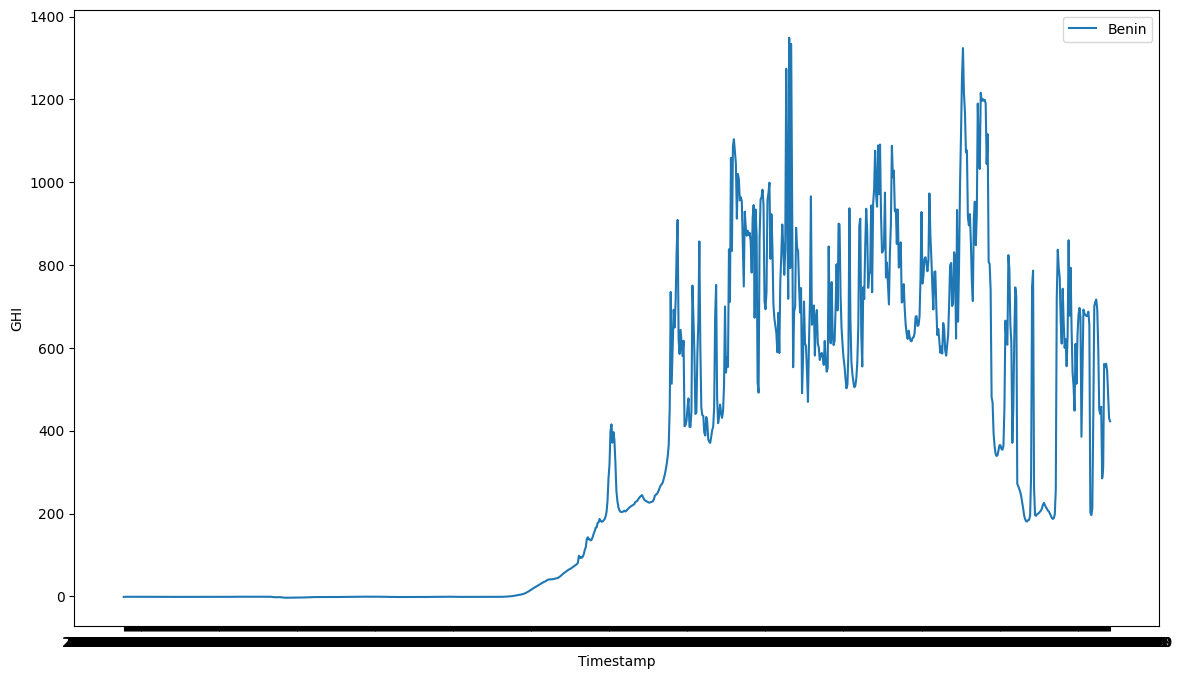

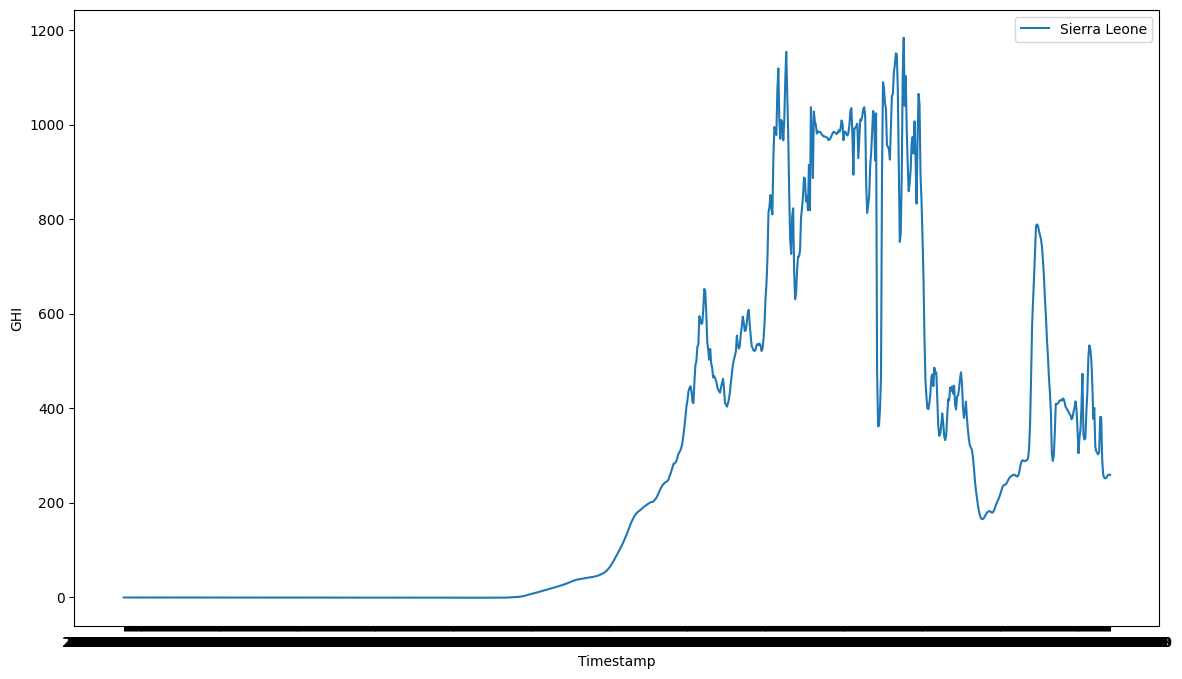

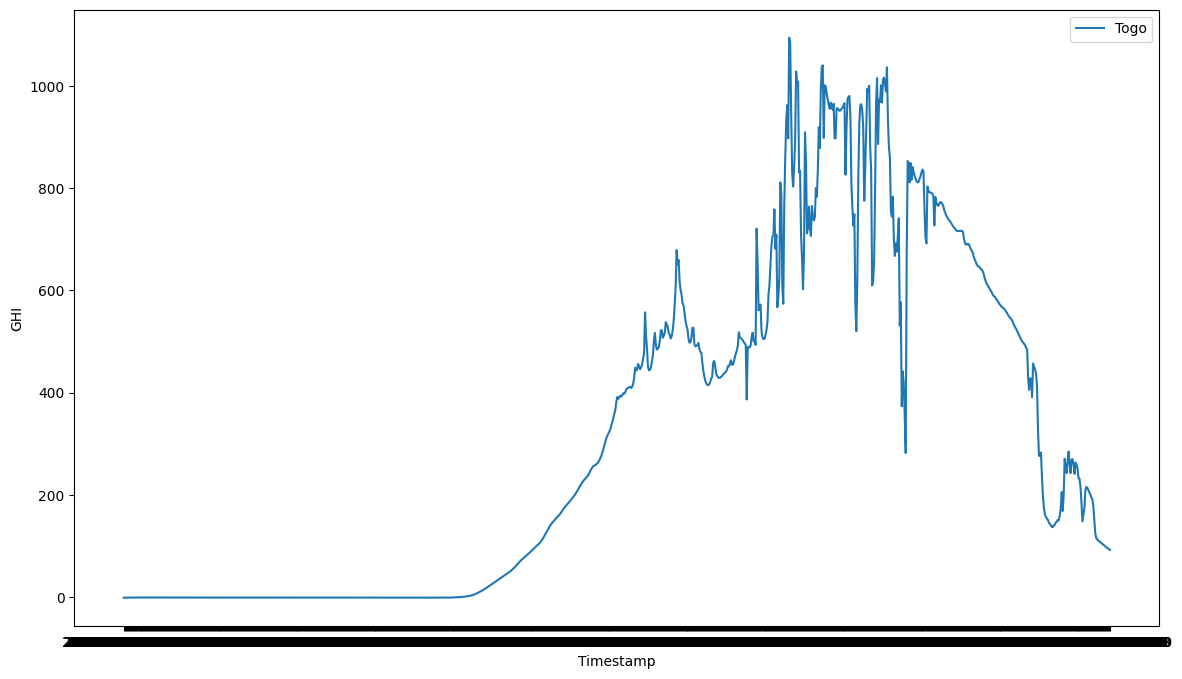

In [20]:
plot_time_series(benin_data,'Benin')
plot_time_series(sierraleone_data,'Sierra Leone')
plot_time_series(togo_data,'Togo')